## Classification of Images from the CIFAR-10 Dataset using ANN (MLP) & CNN

### Objective: 
This lab focuses on training learners to classify images from the CIFAR-10 dataset using Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN). Starting with the basics of neural networks and image data, it progresses to implementing MLP and CNN models with Python libraries like TensorFlow and Keras. Participants will preprocess image data, design network architectures, and train models to classify images into ten categories. By the end, learners will confidently apply ANN and CNN techniques to similar real-world image classification tasks.


### Importing Libraries 


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.__version__

'3.9.3'

In [3]:
tf.__version__

'2.10.1'

# Check for GPU

In [31]:
import tensorflow as tf

# Get list of available physical GPUs
physical_devices = tf.config.list_physical_devices('GPU')

# Check if GPUs are available
if len(physical_devices) > 0:
    print(f"Number of GPUs Available: {len(physical_devices)}\n")
    for i, gpu in enumerate(physical_devices):
        gpu_details = tf.config.experimental.get_device_details(gpu)
        gpu_name = gpu_details.get("device_name", "Unknown GPU")
        print(f"GPU {i + 1}: {gpu_name}")
        
        # Enable memory growth (optional)
        try:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(f"Memory growth enabled for GPU {i + 1}")
        except Exception as e:
            print(f"Could not set memory growth for GPU {i + 1}: {e}")
else:
    print("No GPUs Available")


Number of GPUs Available: 1

GPU 1: NVIDIA GeForce GTX 1650 with Max-Q Design
Could not set memory growth for GPU 1: Physical devices cannot be modified after being initialized


## Loding CIFAR-10 Dataset

In [5]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Showing some example corresponding the Dataset


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


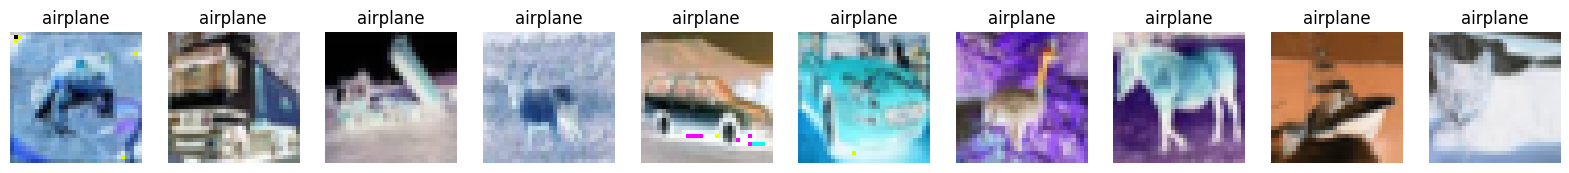

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Example of training images and their labels
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

# Plotting the first 10 images
fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

# Loop through the first 10 images in the training set
for i in range(10):
    image = x_train[i]  # Access the image
    image = (image * 255).astype(np.uint8)  # Rescale pixel values to 0-255
    axarr[i].imshow(image)  # Show image
    axarr[i].axis('off')  # Hide axes for cleaner display
    axarr[i].set_title(cifar10_classes[np.argmax(y_train[i])])  # Show the label class

plt.show()


In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [8]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# ANN Model

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [9]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [10]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [12]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9158 - accuracy: 0.3286 - val_loss: 1.7073 - val_accuracy: 0.3921
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6855 - accuracy: 0.3983 - val_loss: 1.6336 - val_accuracy: 0.4208
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6063 - accuracy: 0.4306 - val_loss: 1.5788 - val_accuracy: 0.4419
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5621 - accuracy: 0.4449 - val_loss: 1.5496 - val_accuracy: 0.4451
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5290 - accuracy: 0.4558 - val_loss: 1.5445 - val_accuracy: 0.4520
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5074 - accuracy: 0.4654 - val_loss: 1.5420 - val_accuracy: 0.4546
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4869 - accuracy: 0.4702 - val_loss: 1.4988 - val_accuracy:

#### With the below simple function we will be able to plot our training history.

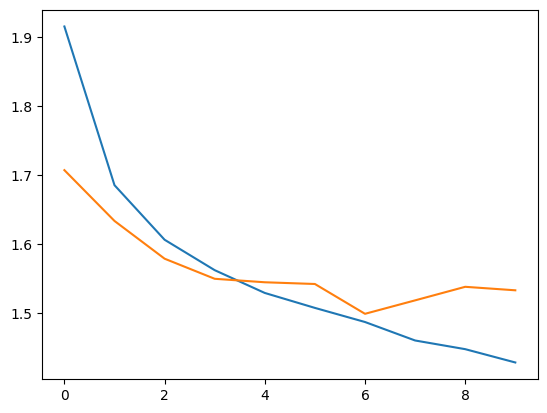

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [15]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [16]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [18]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.5754 - accuracy: 0.4231 - val_loss: 1.1863 - val_accuracy: 0.5799
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1385 - accuracy: 0.5991 - val_loss: 1.0317 - val_accuracy: 0.6399
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9246 - accuracy: 0.6808 - val_loss: 0.8646 - val_accuracy: 0.6977
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7922 - accuracy: 0.7275 - val_loss: 0.8076 - val_accuracy: 0.7224
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6892 - accuracy: 0.7635 - val_loss: 0.7764 - val_accuracy: 0.7359
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6069 - accuracy: 0.7915 - val_loss: 0.7751 - val_accuracy: 0.7432
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5308 - accuracy: 0.8159 - val_loss: 0.7794 - val_accuracy

In [19]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

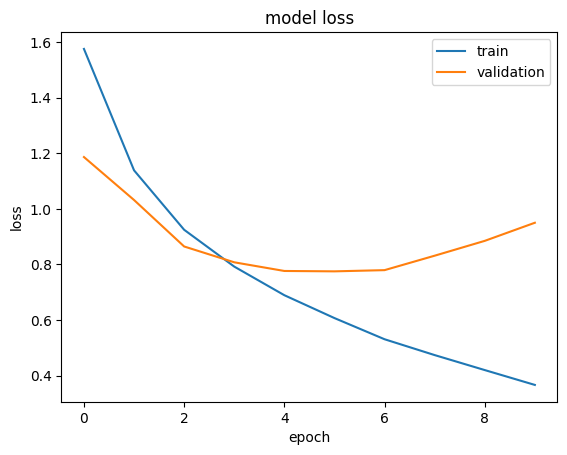

In [20]:
plotLosses(history)

In [21]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

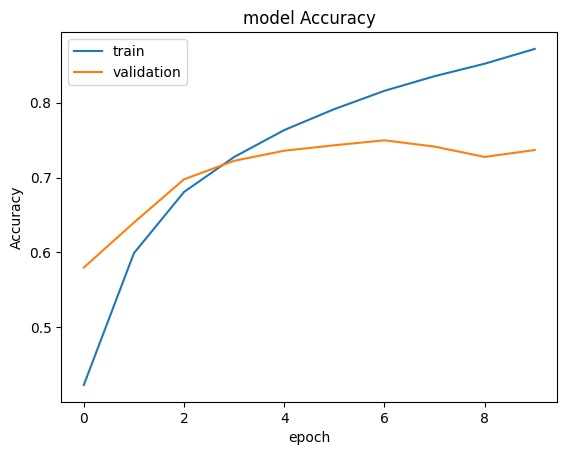

In [22]:
plotAccuracy(history)

In [23]:
from keras.models import load_model
cnn.save('model111.h5')

In [24]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [25]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 [==============================] - 0s 214ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

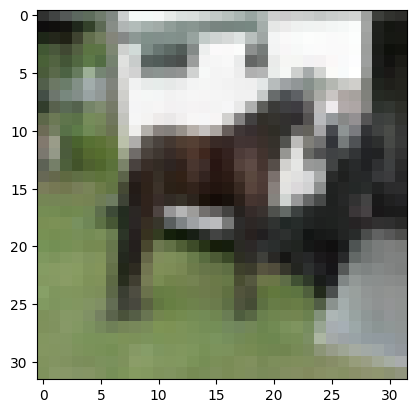

In [35]:
plt.imshow(x_test[20])

In [27]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 [==============================] - 0s 17ms/step
The predicted class is: truck
